In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
tata = pd.read_csv("TATAMOTORS.csv")

In [26]:
tata.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price1,pricediff,return,Direction,average3,tata10,tata50,Shares,Profit,wealth
98,2022-06-10,423.000000,428.850006,422.000000,428.049988,428.049988,11914234,406.700012,-21.349976,-0.049877,0,1292.199982,436.199997,428.679996,1,-21.349976,-21.349976
99,2022-06-13,414.899994,418.149994,405.600006,406.700012,406.700012,17442641,405.149994,-1.550018,-0.003811,0,1263.250000,432.629999,428.100997,1,-1.550018,-22.899994
100,2022-06-14,403.000000,411.850006,397.700012,405.149994,405.149994,19626627,414.100006,8.950012,0.022091,1,1239.899994,428.789999,427.528997,1,8.950012,-13.949982
101,2022-06-15,410.000000,416.399994,407.450012,414.100006,414.100006,15192826,392.950012,-21.149994,-0.051075,0,1225.950012,425.739999,426.987997,0,0.000000,-13.949982
102,2022-06-16,420.000000,420.899994,390.100006,392.950012,392.950012,22261032,388.950012,-4.000000,-0.010179,0,1212.200012,421.120001,425.911997,0,0.000000,-13.949982


In [13]:
tata.shape

(250, 7)

In [4]:
tata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,435.451400,440.498201,428.838200,434.253400,434.253400,1.808901e+07
std,31.853265,32.513530,31.458573,32.146089,32.146089,1.028947e+07
min,380.250000,384.649994,366.200012,372.299988,372.299988,2.871205e+06
25%,413.000000,418.037498,407.412498,412.212509,412.212509,1.203196e+07
50%,431.250000,435.775009,425.150009,430.399994,430.399994,1.492184e+07
75%,451.712509,456.799996,446.237488,450.724998,450.724998,2.029357e+07
max,527.900024,528.500000,512.000000,525.000000,525.000000,7.142575e+07


In [5]:
tata['price1'] = tata['Close'].shift(-1)
tata['pricediff'] = tata['price1'] - tata['Close']
tata['return'] = tata['pricediff']/tata['Close']
tata['Direction'] = [1 if tata['pricediff'].loc[ei] > 0 else 0 for ei in tata.index ]
tata['average3'] = (tata['Close'] + tata['Close'].shift(1) + tata['Close'].shift(2))
tata['tata10'] = tata['Close'].rolling(10).mean()
tata['tata50'] = tata['Close'].rolling(50).mean()
tata = tata.dropna()

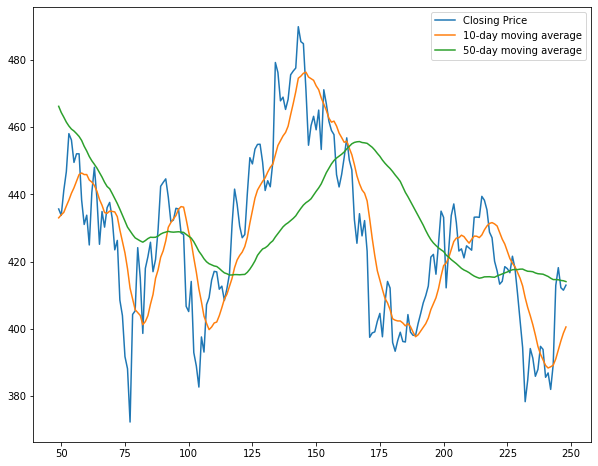

In [6]:
plt.figure(figsize=(10, 8))
tata['Close'].plot(label = 'Closing Price')
tata['tata10'].plot(label = '10-day moving average')
tata['tata50'].plot(label = '50-day moving average')
plt.legend()
plt.show()

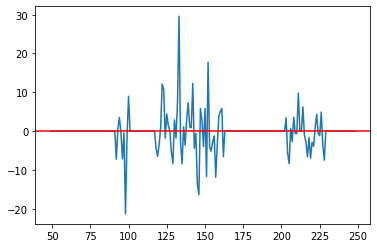

In [14]:
tata['Shares'] = [1 if tata.loc[ei, 'tata10'] > tata.loc[ei, 'tata50'] else 0 for ei in tata.index]
tata['Profit'] = [tata.loc [ei, 'price1'] - tata.loc [ei, 'Close'] if tata.loc[ei, 'Shares']==1 else 0 for ei in tata.index]
tata['Profit'].plot()
plt.axhline(y=0, color='red');

In [15]:
tata['wealth'] = tata['Profit'].cumsum()

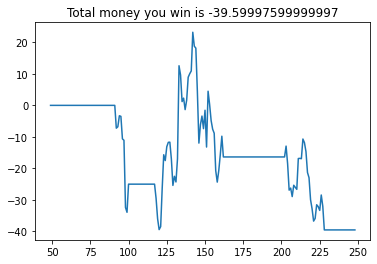

In [10]:
tata['wealth'].plot()
plt.title('Total money you win is {}'.format(tata.loc[tata.index[-2], 'wealth']));